In [ ]:
# Simple Regression Using "MachineHoursCurrentMeter" to Calculate "SalePrice"

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('fast iron 100k data.csv')

In [3]:
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139283,36000,1052214,2232,121,3,1998,0.0,NaN,10/20/2005 0:00,...,None or Unspecified,"11' 0""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1139299,9500,1002713,21442,121,3,2003,0.0,NaN,1/28/2010 0:00,...,16 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
2,1139356,53000,1004127,25458,121,3,2000,0.0,NaN,2/22/2007 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1139369,14000,1050658,1918,121,3,1000,0.0,NaN,1/28/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
4,1139390,8250,1011114,7110,121,3,1000,0.0,NaN,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1417929,93500,26366,3357,132,6,1990,NaN,NaN,2/24/1994 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,1417930,47000,1412330,3357,132,9,1990,NaN,NaN,12/2/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,1417931,47000,1412330,3357,132,9,1990,NaN,NaN,5/20/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,1417934,48000,1412330,3357,132,9,1990,NaN,NaN,8/19/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data['MachineHoursCurrentMeter'] = data['MachineHoursCurrentMeter'].replace(np.nan, 0) # Replaces any null values with 0

In [5]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,1.000000e+05,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.294013e+06,32361.55013,1.067671e+06,5485.211650,129.362860,6.502580,1931.441850,1190.633280
std,7.910623e+04,23797.71391,3.947570e+05,5078.726263,4.696196,15.605157,237.261476,3614.247272
min,1.139246e+06,4750.00000,1.300000e+01,28.000000,121.000000,1.000000,1000.000000,0.000000
25%,1.252166e+06,15500.00000,1.004246e+06,3171.000000,132.000000,1.000000,1984.000000,0.000000
50%,1.292648e+06,24500.00000,1.151534e+06,3819.000000,132.000000,3.000000,1993.000000,0.000000
75%,1.363022e+06,41000.00000,1.355657e+06,6797.000000,132.000000,4.000000,1999.000000,0.000000
max,1.417937e+06,142000.00000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000


In [6]:
y = data['SalePrice']
x1 = data['MachineHoursCurrentMeter']

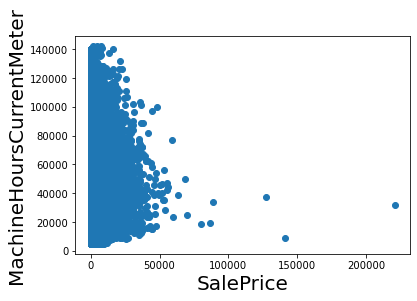

In [7]:
plt.scatter(x1, y)
plt.xlabel('SalePrice', fontsize = 20)
plt.ylabel('MachineHoursCurrentMeter', fontsize = 20)
plt.show()

In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1221.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          7.90e-266
Time:                        10:19:24   Log-Likelihood:            -1.1490e+06
No. Observations:              100000   AIC:                         2.298e+06
Df Residuals:                   99998   BIC:                         2.298e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      3.15e+04     78.754    399.985      0.000    3.13e+04    3.17e+04
MachineHoursCurrentMeter     0.7231      0.021     34.938      0.000       0.683       0.764
==============================================================================
Omnibus:                    26748.274   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60472.371
Skew:                           1.539   Prob(JB):                         0.00
Kurtosis:                       5.245   Cond. No.                     4.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

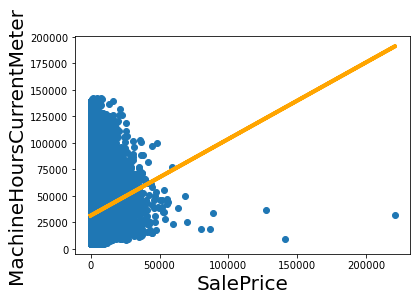

In [9]:
plt.scatter(x1, y)
yhat = 0.7231 * x1 + 31500 # Regression Equation
fig = plt.plot(x1, yhat, lw = 4, c = 'orange', label = 'regression line')
plt.xlabel('SalePrice', fontsize = 20)
plt.ylabel('MachineHoursCurrentMeter', fontsize = 20)
plt.show()

In [10]:
print(results.summary()) # Notice the really low R-squared

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1221.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          7.90e-266
Time:                        10:19:29   Log-Likelihood:            -1.1490e+06
No. Observations:              100000   AIC:                         2.298e+06
Df Residuals:                   99998   BIC:                         2.298e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
# Multiple Regression Using "MachineHoursCurrentMeter" and "YearMade" to Calculate "SalePrice"

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('fast iron 100k data.csv')

In [13]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139283,36000,1052214,2232,121,3,1998,0.0,NaN,10/20/2005 0:00,...,None or Unspecified,"11' 0""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1139299,9500,1002713,21442,121,3,2003,0.0,NaN,1/28/2010 0:00,...,16 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
2,1139356,53000,1004127,25458,121,3,2000,0.0,NaN,2/22/2007 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1139369,14000,1050658,1918,121,3,1000,0.0,NaN,1/28/2010 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
4,1139390,8250,1011114,7110,121,3,1000,0.0,NaN,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,1.000000e+05,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,26309.000000
mean,1.294013e+06,32361.55013,1.067671e+06,5485.211650,129.362860,6.502580,1931.441850,4525.574062
std,7.910623e+04,23797.71391,3.947570e+05,5078.726263,4.696196,15.605157,237.261476,5878.748366
min,1.139246e+06,4750.00000,1.300000e+01,28.000000,121.000000,1.000000,1000.000000,0.000000
25%,1.252166e+06,15500.00000,1.004246e+06,3171.000000,132.000000,1.000000,1984.000000,978.000000
50%,1.292648e+06,24500.00000,1.151534e+06,3819.000000,132.000000,3.000000,1993.000000,2617.000000
75%,1.363022e+06,41000.00000,1.355657e+06,6797.000000,132.000000,4.000000,1999.000000,6188.000000
max,1.417937e+06,142000.00000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000


In [15]:
data['MachineHoursCurrentMeter'] = data['MachineHoursCurrentMeter'].replace(np.nan, 0) # Replaces any null values with 0
data = data[data['YearMade'] != 1000] # Excludes rows in which YearMade has a value of 1000 (which are outliers)

In [16]:
data.describe() # Notice how there are now only 93,916 rows

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,9.391600e+04,93916.000000,9.391600e+04,93916.000000,93916.000000,93916.000000,93916.000000,93916.000000
mean,1.299405e+06,32842.654372,1.068873e+06,5517.963989,129.695664,6.599664,1991.781858,929.588121
std,7.780581e+04,24016.172084,4.013234e+05,5121.838352,4.476376,15.859059,9.747711,2846.448984
min,1.139246e+06,4750.000000,1.300000e+01,28.000000,121.000000,1.000000,1919.000000,0.000000
25%,1.258933e+06,16000.000000,1.001703e+06,3171.000000,132.000000,1.000000,1986.000000,0.000000
50%,1.298802e+06,25000.000000,1.164262e+06,3819.000000,132.000000,3.000000,1994.000000,0.000000
75%,1.366180e+06,42000.000000,1.362241e+06,6805.000000,132.000000,4.000000,1999.000000,0.000000
max,1.417937e+06,142000.000000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000


In [17]:
y = data['SalePrice']
x1 = data[['MachineHoursCurrentMeter', 'YearMade']]

In [18]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2673.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:19:54   Log-Likelihood:            -1.0779e+06
No. Observations:               93916   AIC:                         2.156e+06
Df Residuals:                   93913   BIC:                         2.156e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -9.593e+05   1.61e+04    -59.761      0.000   -9.91e+05   -9.28e+05
MachineHoursCurrentMeter     0.6337      0.028     22.951      0.000       0.580       0.688
YearMade                   497.8320      8.062     61.747      0.000     482.030     513.634
==============================================================================
Omnibus:                    22790.243   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47872.793
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                       5.000   Cond. No.                     6.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print(results.summary()) # R-squared increased from to what it was in simple regression

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2673.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:19:56   Log-Likelihood:            -1.0779e+06
No. Observations:               93916   AIC:                         2.156e+06
Df Residuals:                   93913   BIC:                         2.156e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
# Regression Equation: SalePrice = 0.6337 * MachineHoursCurrentMeter + 497.8320 * YearMade - 959300